In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training Data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Testing Data.csv')

#Data Cleaning of train data

In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df_train.shape

(614, 13)

In [ ]:
df_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
df_train[df_train.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [ ]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Data Manipulation

In [ ]:
#count value in gender column 
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
#fill null place with Male as count of male is greater in gender column
df_train['Gender'].fillna('Male',inplace=True)

In [ ]:
#count value in Married column
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
#fill null place with Yes as count of Yes is greater in married column
df_train['Married'].fillna('Yes',inplace=True)

In [ ]:
#count value in Dependents column
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
#fill null place with 0 as count of 0 is greater in Dependents column 
df_train['Dependents'].fillna('0',inplace=True)

In [ ]:
#count value in Self_Employed column 
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
#fill null place with No as count of No is greater in Self_Employed column
df_train['Self_Employed'].fillna('No',inplace=True)

In [ ]:
#For LoanAmount
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(),inplace=True)

In [ ]:
#count value in Loan_Amount_Term column 
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
#fill null place with 360 as count of 360 is greater in Loan_Amount_Term column
df_train['Loan_Amount_Term'].fillna('360',inplace=True)

In [ ]:
#count value in Credit_History column 
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
#fill null place with 1.0 as count of 1.0 is greater in Credit_History column
df_train['Credit_History'].fillna('1',inplace=True)

In [ ]:
#count value in Credit_History column 
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
1       50
Name: Credit_History, dtype: int64

In [ ]:
#count value in gender column 
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df_train['ApplicantIncome'] = df_train['ApplicantIncome'].astype(int)
df_train['CoapplicantIncome'] = df_train['CoapplicantIncome'].astype(int)
df_train['LoanAmount'] = df_train['LoanAmount'].astype(int)
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].astype(int)
df_train['Credit_History'] = df_train['Credit_History'].astype(int)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    object
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int64(5), object(8)
memory usage: 62.5+ KB


In [ ]:
df_train.to_csv('Clean_train_dataset.csv',index=False)

#Data Cleaning of test data

In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df_test.shape

(367, 12)

In [ ]:
df_test.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [ ]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#Data Manipulation

In [ ]:
#count value in gender column 
df_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [ ]:
#fill null place with Male as count of male is greater in gender column
df_test['Gender'].fillna('Male',inplace=True)

In [ ]:
#count value in Dependents column
df_test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [ ]:
#fill null place with 0 as count of 0 is greater in Dependents column 
df_test['Dependents'].fillna('0',inplace=True)

In [ ]:
#count value in Self_Employed column 
df_test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
#fill null place with No as count of No is greater in Self_Employed column
df_test['Self_Employed'].fillna('No',inplace=True)

In [ ]:
#For LoanAmount
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(),inplace=True)

In [ ]:
#count value in Loan_Amount_Term column 
df_test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
#fill null place with 360 as count of 360 is greater in Loan_Amount_Term column
df_test['Loan_Amount_Term'].fillna('360',inplace=True)

In [ ]:
#count value in Credit_History column 
df_train['Credit_History'].value_counts()

1    525
0     89
Name: Credit_History, dtype: int64

In [ ]:
#fill null place with 1.0 as count of 1.0 is greater in Credit_History column
df_test['Credit_History'].fillna('1',inplace=True)

In [ ]:
#count value in Credit_History column 
df_test['Credit_History'].value_counts()

1.0    279
0.0     59
1       29
Name: Credit_History, dtype: int64

In [ ]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
df_test['ApplicantIncome'] = df_test['ApplicantIncome'].astype(int)
df_test['CoapplicantIncome'] = df_test['CoapplicantIncome'].astype(int)
df_test['LoanAmount'] = df_test['LoanAmount'].astype(int)
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].astype(int)
df_test['Credit_History'] = df_test['Credit_History'].astype(int)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            367 non-null    object
 1   Gender             367 non-null    object
 2   Married            367 non-null    object
 3   Dependents         367 non-null    object
 4   Education          367 non-null    object
 5   Self_Employed      367 non-null    object
 6   ApplicantIncome    367 non-null    int64 
 7   CoapplicantIncome  367 non-null    int64 
 8   LoanAmount         367 non-null    int64 
 9   Loan_Amount_Term   367 non-null    int64 
 10  Credit_History     367 non-null    int64 
 11  Property_Area      367 non-null    object
dtypes: int64(5), object(7)
memory usage: 34.5+ KB


In [ ]:
df_test.to_csv('Clean_test_dataset.csv',index=False)

#Data Visualisation

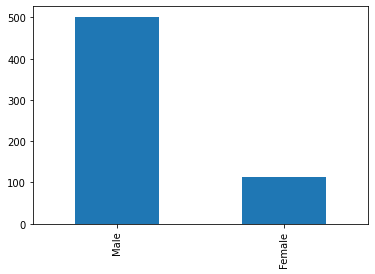

In [ ]:
import matplotlib.pyplot as plt
plotdata=pd.DataFrame(df_train)
plotdata['Gender'].value_counts().plot(kind="bar")

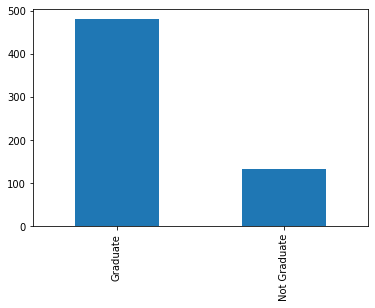

In [ ]:
plotdata['Education'].value_counts().plot(kind="bar")

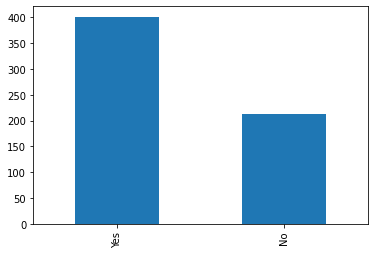

In [ ]:
plotdata['Married'].value_counts().plot(kind="bar")

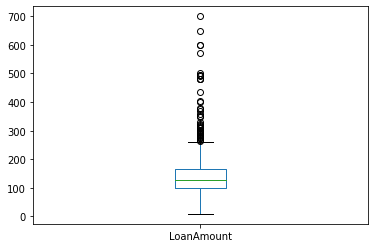

In [ ]:
df_train['LoanAmount'].plot(kind='box')

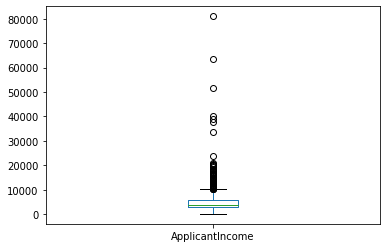

In [ ]:
df_train['ApplicantIncome'].plot(kind='box')

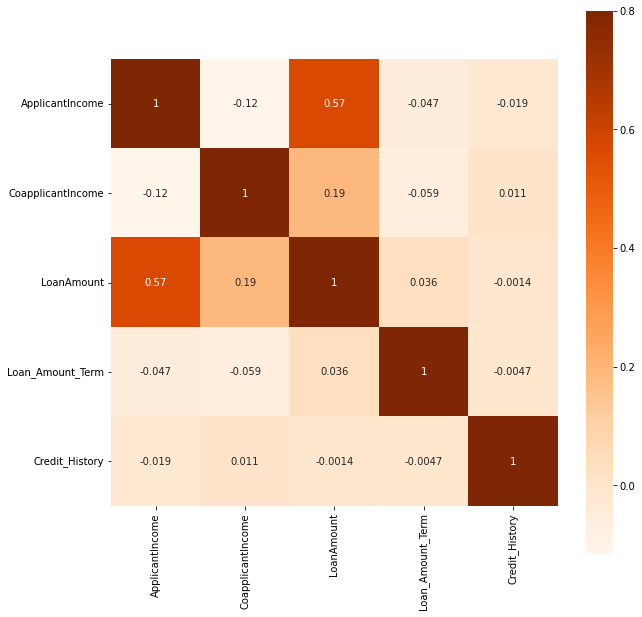

In [ ]:
matrix = df_train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap='Oranges', annot = True)

#Pre-Processing

Label Encoding of train dataset

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
df_train['Loan_ID']= label_encoder.fit_transform(df_train['Loan_ID'])
df_train['Gender']= label_encoder.fit_transform(df_train['Gender'])
df_train['Married']= label_encoder.fit_transform(df_train['Married'])
df_train['Dependents']= label_encoder.fit_transform(df_train['Dependents'])
df_train['Education']= label_encoder.fit_transform(df_train['Education'])
df_train['Self_Employed']= label_encoder.fit_transform(df_train['Self_Employed'])
df_train['Property_Area']= label_encoder.fit_transform(df_train['Property_Area'])
df_train['Loan_Status']= label_encoder.fit_transform(df_train['Loan_Status'])

Label Encoding of test dataset

In [ ]:
df_test['Loan_ID']= label_encoder.fit_transform(df_test['Loan_ID'])
df_test['Gender']= label_encoder.fit_transform(df_test['Gender'])
df_test['Married']= label_encoder.fit_transform(df_test['Married'])
df_test['Dependents']= label_encoder.fit_transform(df_test['Dependents'])
df_test['Education']= label_encoder.fit_transform(df_test['Education'])
df_test['Self_Employed']= label_encoder.fit_transform(df_test['Self_Employed'])
df_test['Property_Area']= label_encoder.fit_transform(df_test['Property_Area'])

In [ ]:
X_train=df_train[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y_train=df_train[['Loan_Status']]
X_test=df_test[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

#Random Forest Regression

In [ ]:
#to import and initiate RandomForest function
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={"max_depth" : [1,3,5,7,9,11,13,15,17,19],
           "n_estimators" : list(range(1,200,20))
           }

In [ ]:
tuning_model=GridSearchCV(rfc,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
# tuning_model.fit(X_train, y_train) 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ........ max_depth=1, n_estimators=1, score=-0.312, total=   0.0s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ........ max_depth=1, n_estimators=1, score=-0.205, total=   0.0s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ........ max_depth=1, n_estimators=1, score=-0.319, total=   0.0s
[CV] max_depth=1, n_estimators=21 ....................................
[CV] ....... max_depth=1, n_estimators=21, score=-0.288, total=   0.0s
[CV] max_depth=1, n_estimators=21 ....................................
[CV] ....... max_depth=1, n_estimators=21, score=-0.312, total=   0.0s
[CV] max_depth=1, n_estimators=21 ....................................
[CV] ....... max_depth=1, n_estimators=21, score=-0.167, total=   0.0s
[CV] max_depth=1, n_estimators=41 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... max_depth=1, n_estimators=41, score=-0.200, total=   0.1s
[CV] max_depth=1, n_estimators=41 ....................................
[CV] ....... max_depth=1, n_estimators=41, score=-0.293, total=   0.1s
[CV] max_depth=1, n_estimators=41 ....................................
[CV] ....... max_depth=1, n_estimators=41, score=-0.309, total=   0.1s
[CV] max_depth=1, n_estimators=61 ....................................
[CV] ....... max_depth=1, n_estimators=61, score=-0.200, total=   0.1s
[CV] max_depth=1, n_estimators=61 ....................................
[CV] ....... max_depth=1, n_estimators=61, score=-0.302, total=   0.1s
[CV] max_depth=1, n_estimators=61 ....................................
[CV] ....... max_depth=1, n_estimators=61, score=-0.196, total=   0.1s
[CV] max_depth=1, n_estimators=81 ....................................
[CV] ....... max_depth=1, n_estimators=81, score=-0.200, total=   0.1s
[CV] max_depth=1, n_estimators=81 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   48.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# tuning_model.best_params_  

{'max_depth': 3, 'n_estimators': 81}

In [ ]:
rfc=RandomForestClassifier(max_depth= 3, n_estimators= 81)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=81,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
df=pd.DataFrame()

In [ ]:
df['Loan_ID'] = df_test['Loan_ID']
df['Gender'] = df_test['Gender']
df['Married'] = df_test['Married']
df['Dependents'] = df_test['Dependents']
df['Education'] = df_test['Education']
df['Self_Employed'] = df_test['Self_Employed']
df['ApplicantIncome'] = df_test['ApplicantIncome']
df['CoapplicantIncome'] = df_test['CoapplicantIncome']
df['LoanAmount'] = df_test['LoanAmount']
df['Loan_Amount_Term'] = df_test['Loan_Amount_Term']
df['Credit_History'] = df_test['Credit_History']
df['Property_Area'] = df_test['Property_Area']
df['Loan_Status'] = y_pred

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,0,0,0,5720,0,110,360,1,2,1
1,1,1,1,1,0,0,3076,1500,126,360,1,2,1
2,2,1,1,2,0,0,5000,1800,208,360,1,2,1
3,3,1,1,2,0,0,2340,2546,100,360,1,2,1
4,4,1,0,0,1,0,3276,0,78,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113,360,1,2,1
363,363,1,1,0,0,0,4158,709,115,360,1,2,1
364,364,1,0,0,0,0,3250,1993,126,360,1,1,1
365,365,1,1,0,0,0,5000,2393,158,360,1,0,1


In [ ]:
df.to_csv('rfc.csv')

#ANSWER OF THE FOLLOWING QUESTION:-

In [ ]:
df_cleantrain=pd.read_csv('Clean_train_dataset.csv')
df_cleantest=pd.read_csv('Clean_test_dataset.csv')

Q-1)What's the ratio of Male to Female?

In [ ]:
df_cleantrain["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
m_count=df_cleantrain[df_cleantrain['Gender'] == 'Male']["Gender"].count()
f_count=df_cleantrain[df_cleantrain['Gender'] == 'Female']["Gender"].count()

In [ ]:
print("Ratio of Male and Female:-" , m_count/f_count)

Ratio of Male and Female:- 4.482142857142857


Q-2)How many Males are married and non-married?

In [ ]:
df_cleantrain[df_cleantrain['Gender']=='Male'].groupby(['Gender', 'Married'])['Married'].count()

Gender  Married
Male    No         133
        Yes        369
Name: Married, dtype: int64

Q-3)How many Males are married and non-married?

In [ ]:
df_cleantrain[df_cleantrain['Gender']=='Female'].groupby(['Gender', 'Married'])['Married'].count()

Gender  Married
Female  No         80
        Yes        32
Name: Married, dtype: int64

Q-4)How many Males and Females are graduated and non-graduated with respect to their Marital status?




In [ ]:
df_cleantrain.groupby(['Gender', 'Education','Married'])['Married'].count()

Gender  Education     Married
Female  Graduate      No          66
                      Yes         26
        Not Graduate  No          14
                      Yes          6
Male    Graduate      No         102
                      Yes        286
        Not Graduate  No          31
                      Yes         83
Name: Married, dtype: int64

Q-5)Which type of encoding will be required to perform on the "Education" column?


ans-5 Lable Encoding or OneHot Encoding

Q-6)Is it a male or a female whose loan amount is the highest?

In [ ]:
df_cleantrain.loc[[df_train[df_train["LoanAmount"] == df_train["LoanAmount"].max()].index[0]],['Gender','LoanAmount']]

,Gender,LoanAmount
171,Male,700


Q-7)The specification and information about the applicant who has the highest income?

In [ ]:
df_cleantrain[df_cleantrain["ApplicantIncome"] == df_cleantrain["ApplicantIncome"].max()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0,360,360,0,Rural,N


Q-8)What all features are you going to consider for the model training and why?

ans-8

features =['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

Loan_ID = Loan id is necessary to indentify a particular person who has taken a loan.

Gender = During the data analysis and visualization we found Male has taken highest loan amount so we can say that it increase a chance of approving a loan to male than to female.

Married = If he/she is married and both the partners are earning than it will increase the chances of loan approval.

Dependents = If a person already has 3 or more ongoing loan so we can't approve new loan.

Education = If he/she is graduate then it will increase the chances of approving the loan.

Self_Employes = I he/she having their own business and their income does not match the requirements the approving a loan due to which they are disqualified.

ApplicantIncome, CoapplicantIncome = From this we can judge that they are eligible for loan or not.

LoanAmount = If the Loan Amount is high and Income is low we can't approve them a loan.

Credit_History = If person has low credit history we can disqualify him/her from approving a loan.

property_area = If he/she wants loan against property the will check the value of a property and approve the loan if it setisfy the requirements.

Q-9)Which model are you going to choose and define the reason for going with the same model?

ans-9 Random Forest Classifiers
I have choosen this model because it provides higher accuracy through cross validation.
Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.
It won’t allow over-fitting trees in the model.

Q-10)Have you performed the Hyper Parameter Tuning?

ans-10 Yes

Q-11)Compare the Actual results with the Predicted results

In [ ]:
c_train = pd.read_csv('Clean_train_dataset.csv')
c_test = pd.read_csv('rfc.csv')
# To change catagorical records to numarcal record
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
c_train[c_train.select_dtypes(include=['object']).columns] = c_train[c_train.select_dtypes(include=['object']).columns].apply(le.fit_transform)
# c_test[c_test.select_dtypes(include=['object']).columns] = c_test[c_test.select_dtypes(include=['object']).columns].apply(le.fit_transform)
# f
# feature selection
X_train_c=c_train[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y_train_c=c_train[['Loan_Status']]
X_test_c=c_test[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y_test_c=c_test[['Loan_Status']]
# model
dt_c = RandomForestClassifier(max_depth= 3, n_estimators= 41)
dt_c.fit(X_train_c, y_train_c)
c_pred_dt= dt_c.predict(X_test_c)

In [ ]:
c_test1 = pd.read_csv('Clean_test_dataset.csv')

In [ ]:
comp=pd.DataFrame()

In [ ]:
comp['Loan_ID']=c_test['Loan_ID']
comp['Actual_value']=c_test['Loan_Status']
comp['Predicted_value']=c_pred_dt

In [ ]:
comp

,Loan_ID,Actual_value,Predicted_value
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
...,...,...,...
362,362,1,1
363,363,1,1
364,364,1,1
365,365,1,1


Q-12)What's the accuracy of your model?

ans-12 100%



In [ ]:
#Calculate the absolute errors
errors = abs(c_pred_dt - c_test['Loan_Status'])
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / c_test['Loan_Status'])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
Accuracy: 100.0 %.


Q-13) In order to improve the accuracy, what more approaches can be done?

ans-13 As we can see accuracy is high means its 100% so there is no need of any approach to incearse accuracy.

Q-14)What can you conclude with respect to the data?

ans-14 Conclusion-->with respect to this data we can predict loan_status i.e. we can know that a person is eligible for loan or not  

In [ ]:
import pickle
rf_filename = 'RF.pkl'
rf_model = open(rf_filename, 'wb')
pickle.dump(rfc, rf_model)
rf_model.close()